# Amazon Sales Report Analysis for the Year 2022

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


In [68]:
df=pd.read_csv('Amazon Sale Report.csv')


In [69]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [71]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [72]:
#Remove the null values and columns that are not required
df.drop(['New','PendingS'],axis=1,inplace=True)
df.dropna(inplace=True)

In [73]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [105]:
#Change the datatype for ship postal code from float to interger
df['ship-postal-code']=df['ship-postal-code'].astype('int')
df['Date']=pd.to_datetime(df['Date'])

In [75]:
df['Month']=df['Date'].dt.month
df['Days']=df['Date'].dt.day

In [78]:
df.describe()

,index,Qty,Amount,ship-postal-code,Days
count,37514.000000,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754,15.530202
std,36844.853039,0.354160,279.952414,194550.425637,8.213737
min,0.000000,0.000000,0.000000,110001.000000,1.000000
25%,27235.250000,1.000000,458.000000,370465.000000,9.000000
50%,63470.500000,1.000000,629.000000,500019.000000,16.000000
75%,91790.750000,1.000000,771.000000,600042.000000,22.000000
max,128891.000000,5.000000,5495.000000,989898.000000,31.000000


In [79]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


In [80]:
df.rename(columns={'Courier Status':'courier_status'},inplace=True)

In [81]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,courier_status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month,Days
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,4,30
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,4,30


# Exploratory Data Analysis

In [82]:
Delivery_status=df['Status'].value_counts(normalize=True)

In [83]:
df1=Delivery_status.index

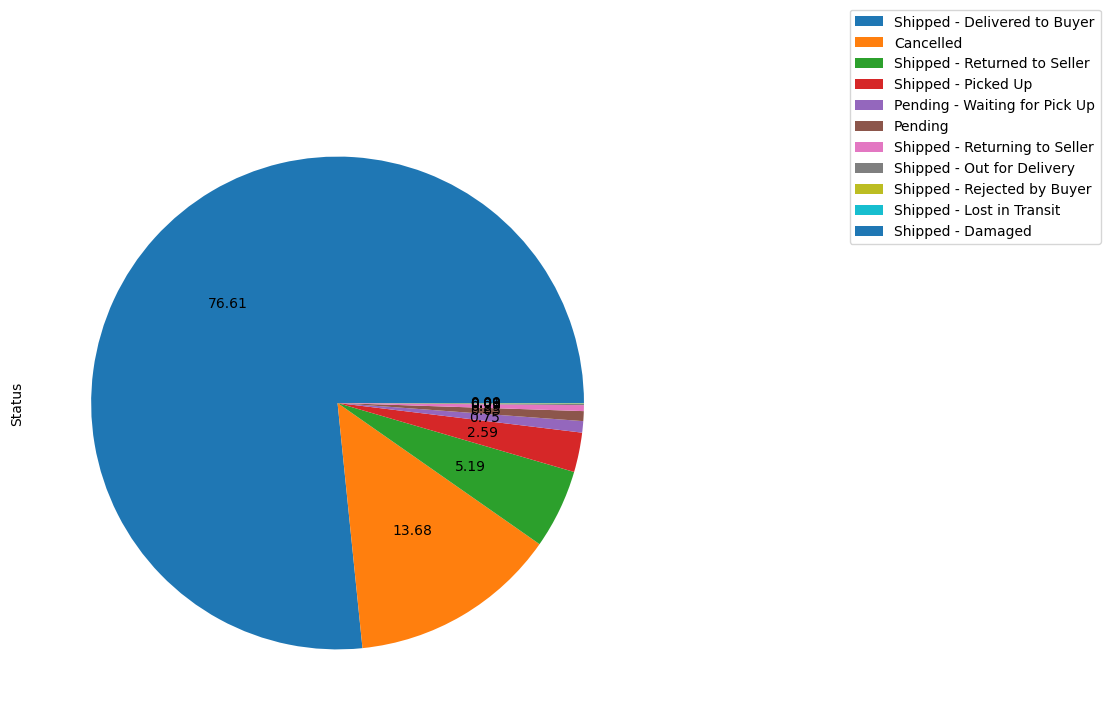

In [84]:
plt.figure(figsize=(15,8))
Delivery_status.plot(kind='pie',autopct='%0.2f',labels=None)
plt.legend(df1,bbox_to_anchor=(1.75, 1.15))


### Note:76.61% of the product ordered are delivered to the Buyers

Text(0, 0.5, 'Counts')

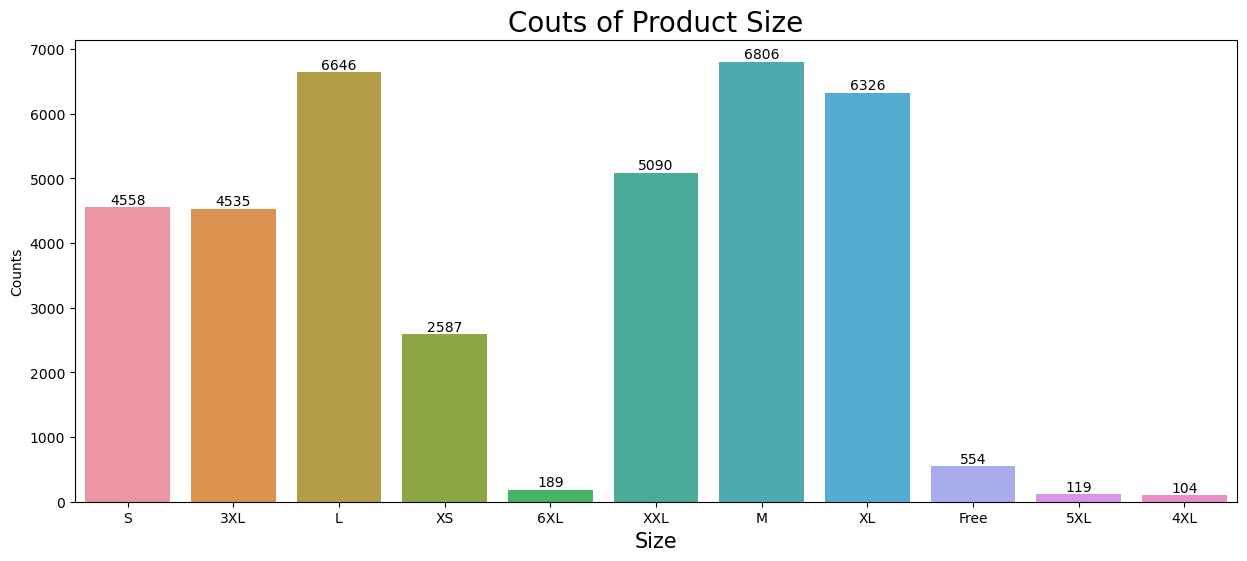

In [85]:
#Show a graph to show the count of product size
plt.figure(figsize=(15,6))
ax=sns.countplot(x='Size',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Couts of Product Size",size=20)
plt.xlabel('Size',size=15)
plt.ylabel('Counts')

   ### Note: From the graph we can say that most people buy M size

In [86]:
#Find the buyers trend for March,April,May and June Month

In [87]:
df['Month']=df['Month'].astype(str)

In [88]:
new_values={'3': 'March','4': 'April','5': 'May','6': 'June'}
df['Month'] = df['Month'].replace(new_values)
df['Month'].value_counts()

April    15091
May      12832
June      9568
March       23
Name: Month, dtype: int64

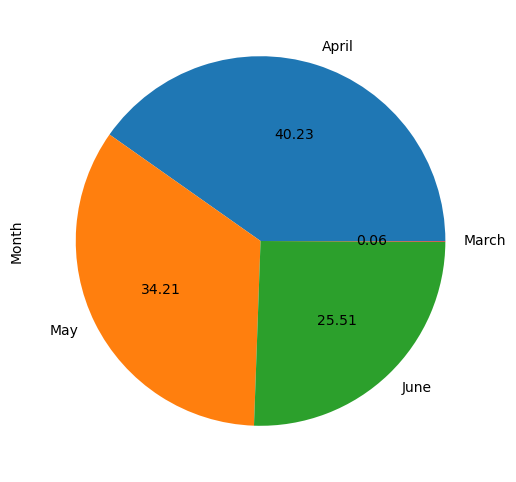

In [89]:
plt.figure(figsize=(6,6))
Day=df['Month'].value_counts().plot(kind='pie',autopct='%0.2f')

### Note: Above pie chart we can see that most numbers of orders were placed in  April followed by May ,June and March

<Axes: xlabel='Size', ylabel='Qty'>

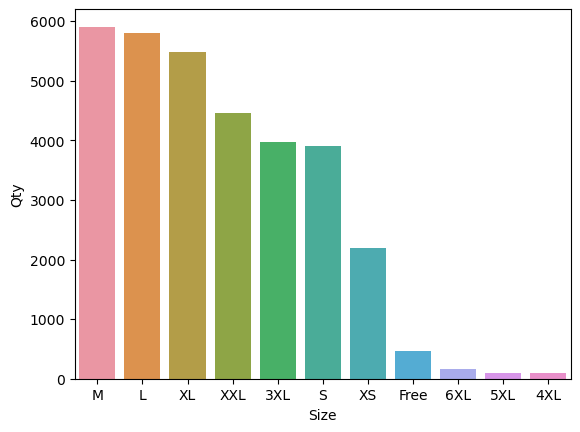

In [90]:
#Show the qunatity of Size ordered using a bargraph
size_Qty=df.groupby(['Size'],as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size',y='Qty',data=size_Qty)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   courier_status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

(array([14062., 13595.,  6661.,     0.,   183.,  2459.,     0.,   228.,
          295.,    31.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

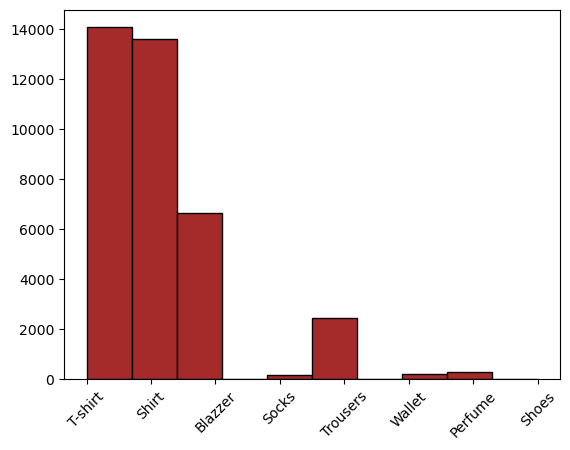

In [92]:
##Show the Category count using a histogram
df['Category']=df['Category'].astype(str)
new_category=df['Category']
plt.xticks(rotation=45)
plt.hist(new_category,edgecolor='k',bins=10,color='brown')

### Note: From the above graph we can see that most number of products sold is T-shirts followed by Shirts                       and Blazzer 

In [94]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,courier_status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month,Days
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,April,30
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,April,30


Text(0, 0.5, 'Size')

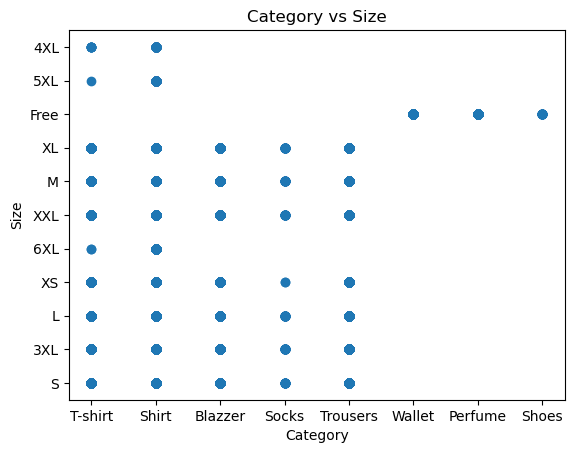

In [104]:
#Plot a scatter plot to show the corealtion between Category and size column
plt.scatter(df['Category'],df['Size'])
plt.title("Category vs Size")
plt.xlabel('Category')
plt.ylabel('Size')

### Note: Above graph shows that some sizes are not present for some categories
 - Free size T-shirts and Shirts are not available 
 - (XS,S,M,L,XL,XXL,3XL,6XL)sizes are not available for Wallet,Perfume,Shoes
 - 6XL size is not available for all categories except T-shirts ans Shirts

In [96]:
# Top 10 State with most Products bought 
top_10_states=df['ship-state'].value_counts().head(10)

In [97]:
new_df=df[df['ship-state'].isin(top_10_states.index)]

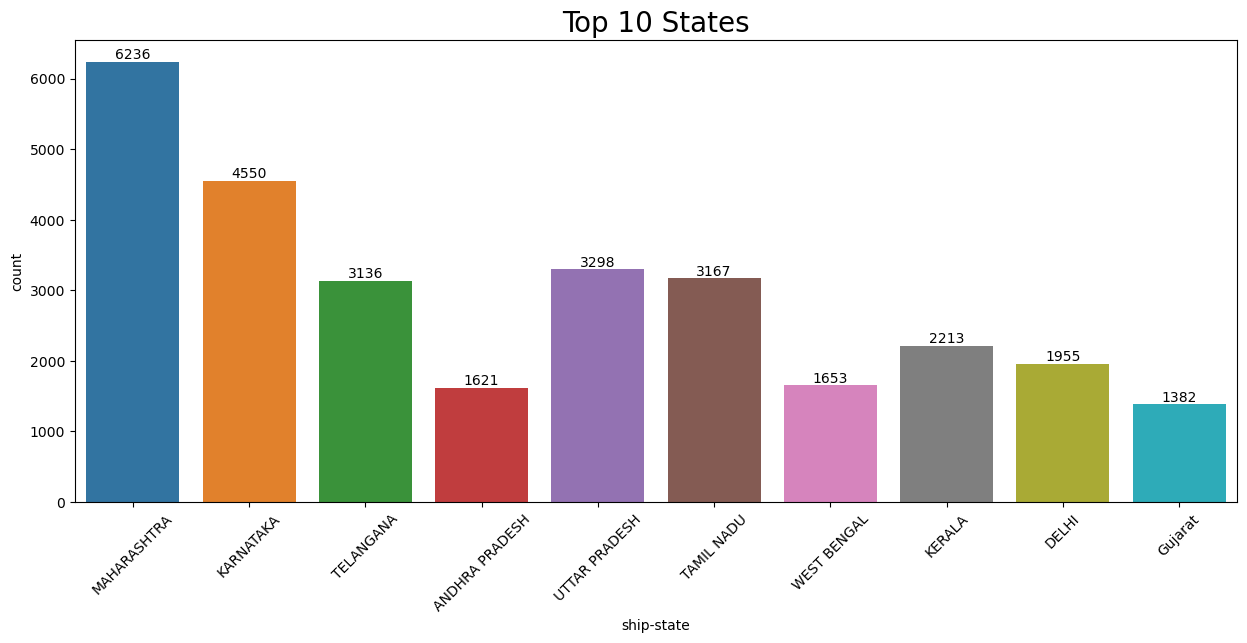

In [98]:
plt.figure(figsize=(15,6))
ax2=sns.countplot(x='ship-state',data=new_df)
plt.title("Top 10 States",size=20)
plt.xticks(rotation=45)
for bars in ax2.containers:
    ax2.bar_label(bars)

### Note: From the above the most numbers of buyers are from Maharastra State and maximum shipping service level were from Expedited

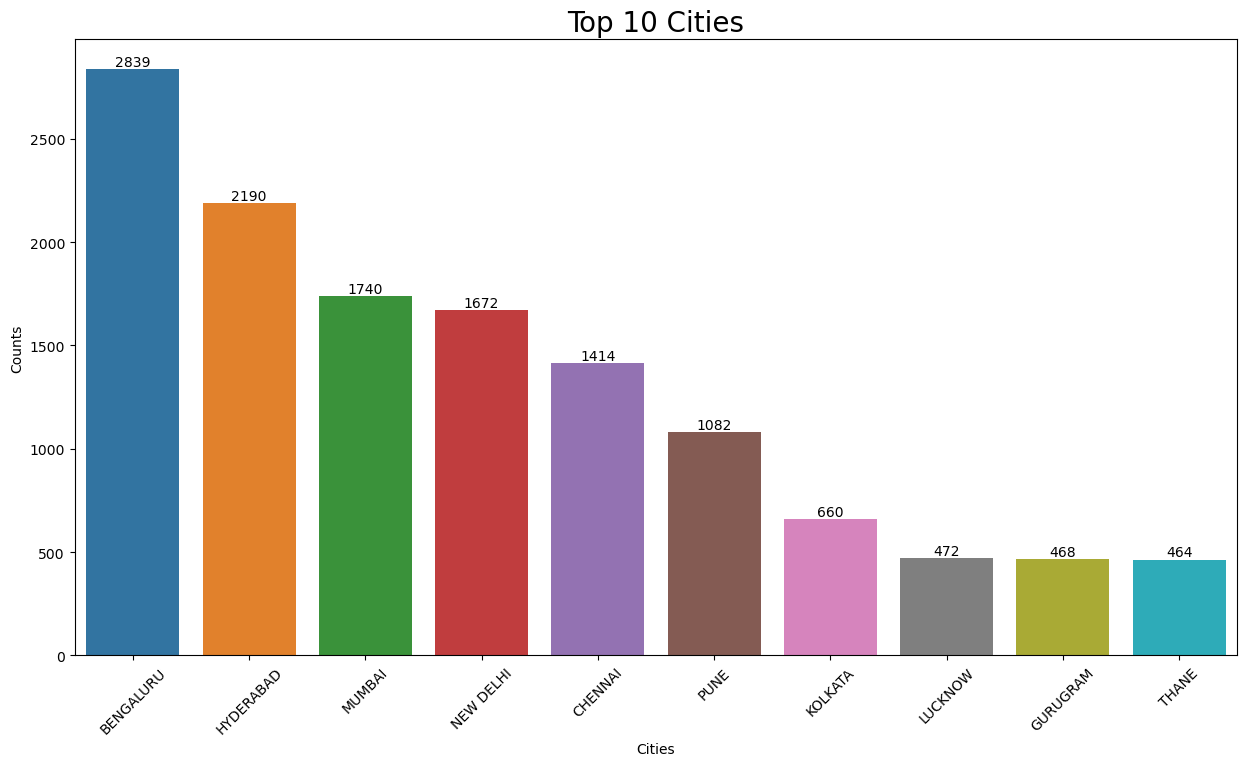

In [99]:
# Top 10 city with respect to number of buyers
top_10_states=df['ship-city'].value_counts().head(10).reset_index()
top_10_states.columns=['Cities','Counts']
plt.figure(figsize=(15,8))
ax3=sns.barplot(x='Cities',y='Counts',data=top_10_states)
plt.title("Top 10 Cities",size=20)
plt.xticks(rotation=45)
for bars in ax3.containers:
    ax3.bar_label(bars)

### Note: From the above graph the most most numbers of buyers are from Bengaluru City

In [100]:
# Find the realtion between status and courier_status then plot it in a heatmap
Category_Size=pd.crosstab(df['Size'],df['Category'])
Category_Size

Category,Blazzer,Perfume,Shirt,Shoes,Socks,T-shirt,Trousers,Wallet
Size,,,,,,,,
3XL,767,0,1828,0,36,1655,249,0
4XL,0,0,97,0,0,7,0,0
5XL,0,0,118,0,0,1,0,0
6XL,0,0,187,0,0,2,0,0
Free,0,295,0,31,0,0,0,228
L,1313,0,2430,0,34,2442,427,0
M,1218,0,2196,0,27,2910,455,0
S,967,0,1423,0,20,1847,301,0
XL,1101,0,2482,0,36,2244,463,0


<Axes: xlabel='Category', ylabel='Size'>

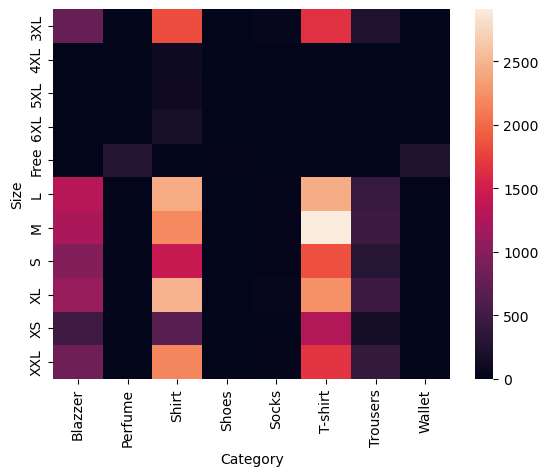

In [101]:
sns.heatmap(Category_Size)

## Conclusion
 - From the analysis we got to know that most of the buyers are from Maharastra State and from Bengaluru City.The highest number of products that were bought is T-shirt and mosltly the customers prefered M size and almost 76.6% of products are Shipped  and Delivered to the buyer which were fulfilled by Merchant